# Handwritten Digit Recognition

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=40)

# Display the first element of X_train
print('The first element of X_train is:', X_train[0])

The first element of X_train is: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  81 223 254 255 203 149  77  77  77
  135 165  68   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

In [3]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

The shape of X is: (48000, 28, 28)
The shape of y is: (48000,)


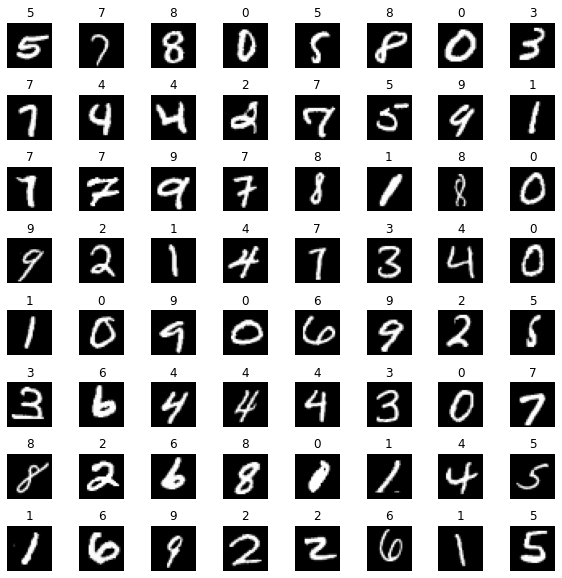

In [4]:
m, h, w = X_train.shape
n = h*w

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Display the image
    ax.imshow(X_train[random_index], cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

# Model Training

In [5]:
tf.random.set_seed(1234) # for consistent results

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = Sequential(
    [  
    layers.Input(shape=(n,)), 
    layers.Dropout(rate=0.1),
    layers.Dense(units=40, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.1),
    layers.Dense(units=20, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.1),
    layers.Dense(units=10, activation='softmax'),
    ], name = "my_model" 
)

model.summary()


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 40)                31400     
                                                                 
 batch_normalization (Batch  (None, 40)                160       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 batch_normalization_1 (Bat  (None, 20)                80        
 chNormalization)                                        

In [6]:
print(model.layers[2].weights)

[<tf.Variable 'batch_normalization/gamma:0' shape=(40,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.], dtype=float32)>, <tf.Variable 'batch_normalization/beta:0' shape=(40,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'batch_normalization/moving_mean:0' shape=(40,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'batch_normalization/moving_variance:0' shape=(40,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
    

In [7]:
# Flatten the images
X_train_flat = X_train.reshape((m, n))

# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['sparse_categorical_accuracy']
)

# Train the model
history = model.fit(
    X_train_flat, y_train,
    epochs=200,
    validation_data=(X_val.reshape((X_val.shape[0], n)), y_val),
    batch_size=256,
    callbacks=[early_stopping], # put the callbacks in a list
    verbose=0,  # turn off training log
)

# Model Validating

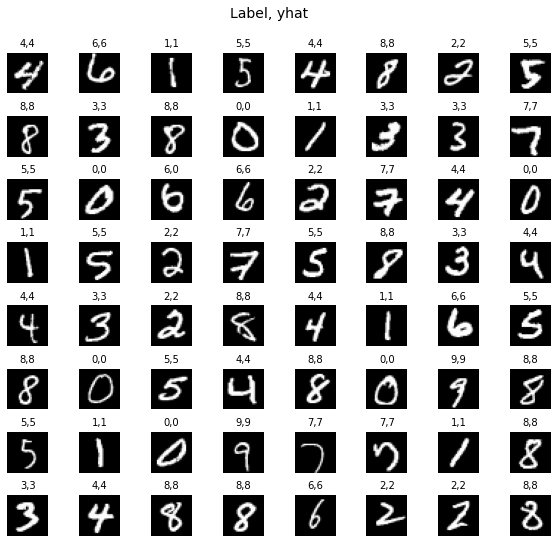

In [8]:
m, h, w = X_val.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Display the image
    ax.imshow(X_val[random_index], cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_val[random_index].reshape(1,n), verbose=0)
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_val[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

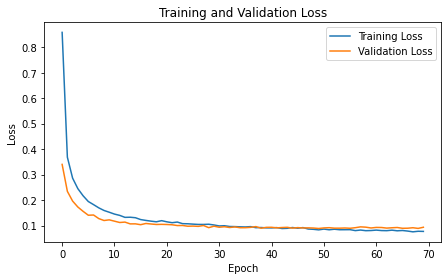

In [9]:
# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot learning curves
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Print training and validation accuracy if available
print("Training Loss:", history.history['loss'][-1])  # Print the last epoch accuracy
print("Validation Loss:", history.history['val_loss'][-1])  # Print the last epoch accuracy

Training Loss: 0.07693654298782349
Validation Loss: 0.09318788349628448


# Testing

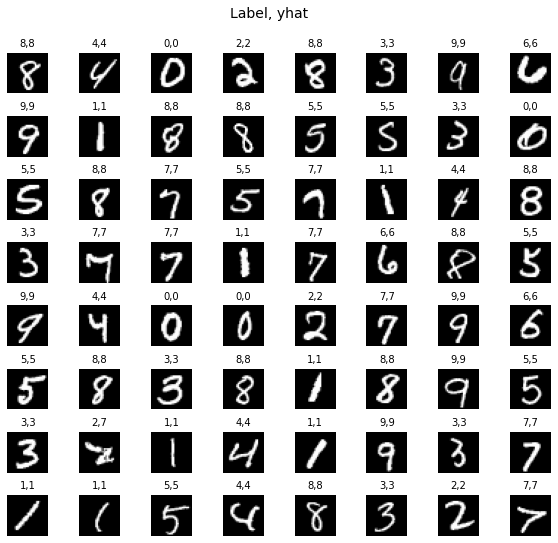

In [11]:
m, h, w = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Display the image
    ax.imshow(X_test[random_index], cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,n), verbose=0)
    prediction_p = tf.nn.softmax(prediction)
    yhat_test = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{yhat_test}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_test_flattened = X_test.reshape((X_test.shape[0], n))

# Evaluate the model on the test data using sparse categorical crossentropy
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test, verbose=0)
print("Test Loss:", test_loss)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Loss: 0.08648882806301117
Test Accuracy: 97.44%
